# Weather prediction dataset - regression task: tomorrow sunshine hours 

In [2]:
import os
import numpy as np
import pandas as pd
import tensorflow as tf
from matplotlib import pyplot as plt

In [3]:
path_root = os.path.dirname(os.getcwd())
path_data = os.path.join(path_root, "dataset")
filename_data = os.path.join(path_data, "weather_prediction_dataset.csv")

In [4]:
data = pd.read_csv(filename_data)
data.head()

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,20000101,1,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,20000102,1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,20000103,1,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,20000104,1,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,20000105,1,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


In [5]:
data.iloc[:5,:5]

,DATE,MONTH,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure
0,20000101,1,8,0.89,1.0286
1,20000102,1,8,0.87,1.0318
2,20000103,1,5,0.81,1.0314
3,20000104,1,7,0.79,1.0262
4,20000105,1,5,0.90,1.0246


In [6]:
list({x.split("_")[0] for x in data.columns if x not in ["MONTH", "DATE"]})

['MUENCHEN',
 'STOCKHOLM',
 'MONTELIMAR',
 'DE',
 'KASSEL',
 'MAASTRICHT',
 'LJUBLJANA',
 'HEATHROW',
 'PERPIGNAN',
 'SONNBLICK',
 'ROMA',
 'DUSSELDORF',
 'TOURS',
 'MALMO',
 'BASEL',
 'OSLO',
 'BUDAPEST',
 'DRESDEN']

# Split data into data (X) and labels (y)
We here want to predict the sunshine hours for a particular place (say BASEL which is about in the center of all 18 locations). 

In [7]:
# data
X_data = data.loc[:365*3].drop(columns=['DATE', 'MONTH'])

# labels (sunshine hours the next day)
y_data = data.loc[1:(365*3 + 1)]["BASEL_sunshine"]

In [8]:
X_data.head()

,BASEL_cloud_cover,BASEL_humidity,BASEL_pressure,BASEL_global_radiation,BASEL_precipitation,BASEL_sunshine,BASEL_temp_mean,BASEL_temp_min,BASEL_temp_max,BUDAPEST_cloud_cover,...,STOCKHOLM_temp_min,STOCKHOLM_temp_max,TOURS_wind_speed,TOURS_humidity,TOURS_pressure,TOURS_global_radiation,TOURS_precipitation,TOURS_temp_mean,TOURS_temp_min,TOURS_temp_max
0,8,0.89,1.0286,0.20,0.03,0.0,2.9,1.6,3.9,3,...,-9.3,0.7,1.6,0.97,1.0275,0.25,0.04,8.5,7.2,9.8
1,8,0.87,1.0318,0.25,0.00,0.0,3.6,2.7,4.8,8,...,0.5,2.0,2.0,0.99,1.0293,0.17,0.16,7.9,6.6,9.2
2,5,0.81,1.0314,0.50,0.00,3.7,2.2,0.1,4.8,6,...,-1.0,2.8,3.4,0.91,1.0267,0.27,0.00,8.1,6.6,9.6
3,7,0.79,1.0262,0.63,0.35,6.9,3.9,0.5,7.5,8,...,2.5,4.6,4.9,0.95,1.0222,0.11,0.44,8.6,6.4,10.8
4,5,0.90,1.0246,0.51,0.07,3.7,6.0,3.8,8.6,5,...,-1.8,2.9,3.6,0.95,1.0209,0.39,0.04,8.0,6.4,9.5


<AxesSubplot:>

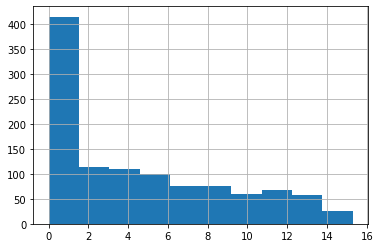

In [9]:
y_data.hist()

# Split data into training, validation, and test set

In [14]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0) 
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

print(f"Data split into training ({X_train.shape[0]})," \
      f" validation ({X_val.shape[0]}) and test set ({X_test.shape[0]}).") 

Data split into training (767), validation (164) and test set (165).


In [15]:
# this also shuffled the data!
y_train[:10]

459     1.0
182     9.6
428     0.0
816    10.2
10      0.0
454     2.5
821    11.2
579     8.3
753     0.0
849     2.9
Name: BASEL_sunshine, dtype: float64

In [16]:
y_train.max(), y_train.min()

(15.3, 0.0)

# Build neural network

In [17]:
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [18]:
X_train.shape, y_train.shape

((767, 163), (767,))

In [19]:
from tensorflow import keras

# input layers
input = keras.layers.Input(shape=(n_features,), name='input')

# Dense layers
layers_dense = keras.layers.Dense(100, 'relu')(input)
layers_dense = keras.layers.Dense(50, 'relu')(layers_dense)

# Output layer
output = keras.layers.Dense(n_predictions)(layers_dense)

model = keras.models.Model(inputs=input, outputs=output, name="weather_prediction_model")

n_features = X_data.shape[1]
n_predictions = 1
model = create_nn(n_features, n_predictions)
model.summary()

Model: "weather_prediction_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 163)]             0         
_________________________________________________________________
dense (Dense)                (None, 100)               16400     
_________________________________________________________________
dense_1 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 51        
Total params: 21,501
Trainable params: 21,501
Non-trainable params: 0
_________________________________________________________________


In [20]:
model.compile(loss='mse', optimizer=Adam(), metrics=['mae', tf.keras.metrics.RootMeanSquaredError()])
history = model.fit(X_train, y_train,
                    batch_size=32,
                    epochs=200,
                    verbose=2)

Epoch 1/200
77/77 - 1s - loss: 17.7981 - mae: 3.3528 - root_mean_squared_error: 4.2188
Epoch 2/200
77/77 - 0s - loss: 14.4937 - mae: 3.0443 - root_mean_squared_error: 3.8071
Epoch 3/200
77/77 - 0s - loss: 12.2306 - mae: 2.8167 - root_mean_squared_error: 3.4972
Epoch 4/200
77/77 - 0s - loss: 12.3061 - mae: 2.8122 - root_mean_squared_error: 3.5080
Epoch 5/200
77/77 - 0s - loss: 11.4408 - mae: 2.7031 - root_mean_squared_error: 3.3824
Epoch 6/200
77/77 - 0s - loss: 11.2741 - mae: 2.6958 - root_mean_squared_error: 3.3577
Epoch 7/200
77/77 - 0s - loss: 11.9112 - mae: 2.7892 - root_mean_squared_error: 3.4513
Epoch 8/200
77/77 - 0s - loss: 10.1774 - mae: 2.5321 - root_mean_squared_error: 3.1902
Epoch 9/200
77/77 - 0s - loss: 10.5404 - mae: 2.5663 - root_mean_squared_error: 3.2466
Epoch 10/200
77/77 - 0s - loss: 10.2930 - mae: 2.5491 - root_mean_squared_error: 3.2083
Epoch 11/200
77/77 - 0s - loss: 10.0740 - mae: 2.5017 - root_mean_squared_error: 3.1740
Epoch 12/200
77/77 - 0s - loss: 9.5203 - 

77/77 - 0s - loss: 1.6746 - mae: 0.9423 - root_mean_squared_error: 1.2941
Epoch 96/200
77/77 - 0s - loss: 1.6183 - mae: 0.9115 - root_mean_squared_error: 1.2721
Epoch 97/200
77/77 - 0s - loss: 1.2722 - mae: 0.8383 - root_mean_squared_error: 1.1279
Epoch 98/200
77/77 - 0s - loss: 1.4958 - mae: 0.8922 - root_mean_squared_error: 1.2230
Epoch 99/200
77/77 - 0s - loss: 1.5824 - mae: 0.9165 - root_mean_squared_error: 1.2579
Epoch 100/200
77/77 - 0s - loss: 1.1789 - mae: 0.8003 - root_mean_squared_error: 1.0858
Epoch 101/200
77/77 - 0s - loss: 1.1323 - mae: 0.7785 - root_mean_squared_error: 1.0641
Epoch 102/200
77/77 - 0s - loss: 1.1053 - mae: 0.7830 - root_mean_squared_error: 1.0514
Epoch 103/200
77/77 - 0s - loss: 1.1679 - mae: 0.7747 - root_mean_squared_error: 1.0807
Epoch 104/200
77/77 - 0s - loss: 1.3869 - mae: 0.8632 - root_mean_squared_error: 1.1777
Epoch 105/200
77/77 - 0s - loss: 1.0659 - mae: 0.7684 - root_mean_squared_error: 1.0324
Epoch 106/200
77/77 - 0s - loss: 1.1880 - mae: 0.7

Epoch 189/200
77/77 - 0s - loss: 0.6130 - mae: 0.6058 - root_mean_squared_error: 0.7830
Epoch 190/200
77/77 - 0s - loss: 0.5715 - mae: 0.5787 - root_mean_squared_error: 0.7560
Epoch 191/200
77/77 - 0s - loss: 0.6269 - mae: 0.6020 - root_mean_squared_error: 0.7918
Epoch 192/200
77/77 - 0s - loss: 0.4427 - mae: 0.5131 - root_mean_squared_error: 0.6654
Epoch 193/200
77/77 - 0s - loss: 0.3046 - mae: 0.4253 - root_mean_squared_error: 0.5519
Epoch 194/200
77/77 - 0s - loss: 0.2976 - mae: 0.4141 - root_mean_squared_error: 0.5455
Epoch 195/200
77/77 - 0s - loss: 0.9477 - mae: 0.6787 - root_mean_squared_error: 0.9735
Epoch 196/200
77/77 - 0s - loss: 0.9708 - mae: 0.7325 - root_mean_squared_error: 0.9853
Epoch 197/200
77/77 - 0s - loss: 0.7585 - mae: 0.6656 - root_mean_squared_error: 0.8709
Epoch 198/200
77/77 - 0s - loss: 0.6934 - mae: 0.6296 - root_mean_squared_error: 0.8327
Epoch 199/200
77/77 - 0s - loss: 0.6375 - mae: 0.6038 - root_mean_squared_error: 0.7984
Epoch 200/200
77/77 - 0s - loss:

Text(0, 0.5, 'RMSE')

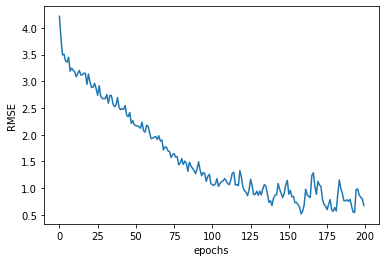

In [21]:
import seaborn as sns

history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df['root_mean_squared_error'])
plt.xlabel("epochs")
plt.ylabel("RMSE")
#plt.savefig("03_training_history_1_rmse.png", dpi=200)

Text(0.5, 0, 'epochs')

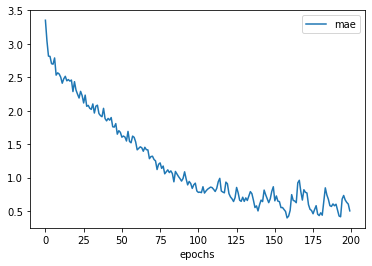

In [22]:
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['mae']])
plt.xlabel("epochs")
#plt.savefig("03_training_history_1_mae.png", dpi=200)

# Evaluate the model on the train and the test set

In [23]:
# Predict the sunshine hours
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

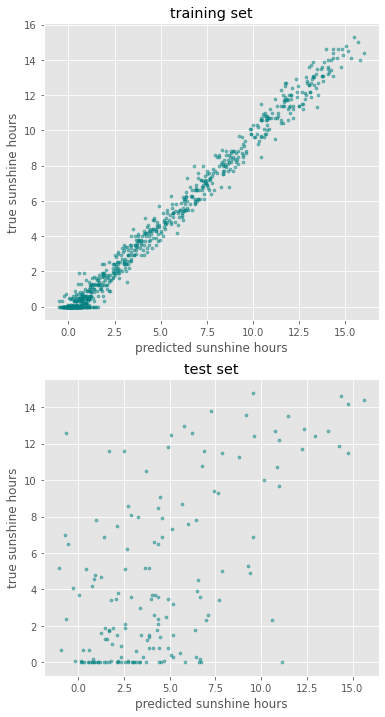

In [27]:
fig, axes = plt.subplots(2, 1, figsize=(6, 12))
plt.style.use('ggplot')
axes[0].scatter(y_train_predicted, y_train, s=10, alpha=0.5, color="teal")
axes[0].set_title("training set")
axes[0].set_xlabel("predicted sunshine hours")
axes[0].set_ylabel("true sunshine hours")

axes[1].scatter(y_test_predicted, y_test, s=10, alpha=0.5, color="teal")
axes[1].set_title("test set")
axes[1].set_xlabel("predicted sunshine hours")
axes[1].set_ylabel("true sunshine hours")

plt.savefig("sunshine_tomorrow_training_test.png", dpi=300)

# Use the validation set to monitor the training process

In [20]:
model = create_nn(n_features=X_train.shape[1], n_predictions=1)
model.compile(loss='mse', optimizer=Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "weather_prediction_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 163)]             0         
_________________________________________________________________
dense_3 (Dense)              (None, 100)               16400     
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dense_5 (Dense)              (None, 1)                 51        
Total params: 21,501
Trainable params: 21,501
Non-trainable params: 0
_________________________________________________________________


In [21]:
history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 200,
                    validation_data=(X_val, y_val), verbose = 2)

Epoch 1/200
24/24 - 3s - loss: 27.6291 - root_mean_squared_error: 5.2563 - val_loss: 13.5236 - val_root_mean_squared_error: 3.6774
Epoch 2/200
24/24 - 0s - loss: 12.2392 - root_mean_squared_error: 3.4985 - val_loss: 10.9629 - val_root_mean_squared_error: 3.3110
Epoch 3/200
24/24 - 0s - loss: 10.9603 - root_mean_squared_error: 3.3106 - val_loss: 9.6433 - val_root_mean_squared_error: 3.1054
Epoch 4/200
24/24 - 0s - loss: 10.3195 - root_mean_squared_error: 3.2124 - val_loss: 9.5790 - val_root_mean_squared_error: 3.0950
Epoch 5/200
24/24 - 0s - loss: 10.0815 - root_mean_squared_error: 3.1751 - val_loss: 9.5927 - val_root_mean_squared_error: 3.0972
Epoch 6/200
24/24 - 0s - loss: 9.7583 - root_mean_squared_error: 3.1238 - val_loss: 9.3800 - val_root_mean_squared_error: 3.0627
Epoch 7/200
24/24 - 0s - loss: 9.2920 - root_mean_squared_error: 3.0483 - val_loss: 9.2895 - val_root_mean_squared_error: 3.0479
Epoch 8/200
24/24 - 0s - loss: 9.0499 - root_mean_squared_error: 3.0083 - val_loss: 9.3297

Epoch 64/200
24/24 - 0s - loss: 3.6446 - root_mean_squared_error: 1.9091 - val_loss: 10.4864 - val_root_mean_squared_error: 3.2383
Epoch 65/200
24/24 - 0s - loss: 3.4564 - root_mean_squared_error: 1.8591 - val_loss: 11.0362 - val_root_mean_squared_error: 3.3221
Epoch 66/200
24/24 - 0s - loss: 3.6307 - root_mean_squared_error: 1.9054 - val_loss: 10.1266 - val_root_mean_squared_error: 3.1822
Epoch 67/200
24/24 - 0s - loss: 3.5011 - root_mean_squared_error: 1.8711 - val_loss: 11.0235 - val_root_mean_squared_error: 3.3202
Epoch 68/200
24/24 - 0s - loss: 3.2107 - root_mean_squared_error: 1.7918 - val_loss: 10.4979 - val_root_mean_squared_error: 3.2400
Epoch 69/200
24/24 - 0s - loss: 3.1805 - root_mean_squared_error: 1.7834 - val_loss: 10.5978 - val_root_mean_squared_error: 3.2554
Epoch 70/200
24/24 - 0s - loss: 3.8877 - root_mean_squared_error: 1.9717 - val_loss: 12.3108 - val_root_mean_squared_error: 3.5087
Epoch 71/200
24/24 - 0s - loss: 4.3505 - root_mean_squared_error: 2.0858 - val_loss

Epoch 127/200
24/24 - 0s - loss: 1.0392 - root_mean_squared_error: 1.0194 - val_loss: 11.4414 - val_root_mean_squared_error: 3.3825
Epoch 128/200
24/24 - 0s - loss: 1.1415 - root_mean_squared_error: 1.0684 - val_loss: 11.0641 - val_root_mean_squared_error: 3.3263
Epoch 129/200
24/24 - 0s - loss: 1.0936 - root_mean_squared_error: 1.0458 - val_loss: 11.5137 - val_root_mean_squared_error: 3.3932
Epoch 130/200
24/24 - 0s - loss: 0.9763 - root_mean_squared_error: 0.9881 - val_loss: 10.6324 - val_root_mean_squared_error: 3.2607
Epoch 131/200
24/24 - 0s - loss: 1.1258 - root_mean_squared_error: 1.0610 - val_loss: 11.2878 - val_root_mean_squared_error: 3.3597
Epoch 132/200
24/24 - 0s - loss: 1.2073 - root_mean_squared_error: 1.0988 - val_loss: 11.6999 - val_root_mean_squared_error: 3.4205
Epoch 133/200
24/24 - 0s - loss: 1.0774 - root_mean_squared_error: 1.0380 - val_loss: 11.2009 - val_root_mean_squared_error: 3.3468
Epoch 134/200
24/24 - 0s - loss: 0.9343 - root_mean_squared_error: 0.9666 - 

24/24 - 0s - loss: 0.6996 - root_mean_squared_error: 0.8364 - val_loss: 11.0213 - val_root_mean_squared_error: 3.3198
Epoch 190/200
24/24 - 0s - loss: 0.5844 - root_mean_squared_error: 0.7645 - val_loss: 10.9547 - val_root_mean_squared_error: 3.3098
Epoch 191/200
24/24 - 0s - loss: 0.6641 - root_mean_squared_error: 0.8149 - val_loss: 10.5784 - val_root_mean_squared_error: 3.2524
Epoch 192/200
24/24 - 0s - loss: 0.6396 - root_mean_squared_error: 0.7998 - val_loss: 10.8637 - val_root_mean_squared_error: 3.2960
Epoch 193/200
24/24 - 0s - loss: 0.5095 - root_mean_squared_error: 0.7138 - val_loss: 11.0212 - val_root_mean_squared_error: 3.3198
Epoch 194/200
24/24 - 0s - loss: 0.3381 - root_mean_squared_error: 0.5815 - val_loss: 11.3284 - val_root_mean_squared_error: 3.3658
Epoch 195/200
24/24 - 0s - loss: 0.3560 - root_mean_squared_error: 0.5967 - val_loss: 11.0364 - val_root_mean_squared_error: 3.3221
Epoch 196/200
24/24 - 0s - loss: 0.2848 - root_mean_squared_error: 0.5337 - val_loss: 11.1

Text(0, 0.5, 'RMSE')

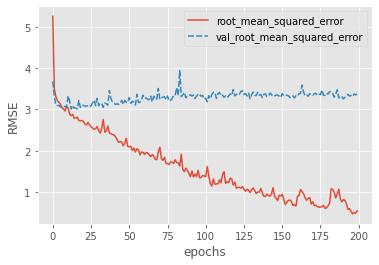

In [22]:
import seaborn as sns

history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])
plt.xlabel("epochs")
plt.ylabel("RMSE")
#plt.savefig("03_training_history_2_rmse.png", dpi=200)

## Multiple observations --> somethings wrong with training!
- Severe overfitting! (validation loss >> training loss)
- No smooth learning process: Large jumps in losses over epochs!

## Remedy 1: make network smaler!

In [23]:
def create_nn(n_features, n_predictions):
    # Input layer
    input = Input(shape=(n_features,), name='input')

    # Dense layers
    layers_dense = Dense(10, 'relu')(input)
    layers_dense = Dense(5, 'relu')(layers_dense)

    # Output layer
    output = Dense(n_predictions)(layers_dense)

    # Defining the model and compiling it
    return Model(inputs=input, outputs=output, name="small_prediction_model")

n_features = X_data.shape[1]
n_predictions = 1

model = create_nn(n_features, n_predictions)
model.compile(loss='mse', optimizer=Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "small_prediction_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 163)]             0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)                1640      
_________________________________________________________________
dense_7 (Dense)              (None, 5)                 55        
_________________________________________________________________
dense_8 (Dense)              (None, 1)                 6         
Total params: 1,701
Trainable params: 1,701
Non-trainable params: 0
_________________________________________________________________


In [24]:
history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 200,
                    validation_data=(X_val, y_val), verbose = 2)

Epoch 1/200
16/16 - 1s - loss: 21.3210 - root_mean_squared_error: 4.6175 - val_loss: 16.6937 - val_root_mean_squared_error: 4.0858
Epoch 2/200
16/16 - 0s - loss: 15.3455 - root_mean_squared_error: 3.9173 - val_loss: 13.7648 - val_root_mean_squared_error: 3.7101
Epoch 3/200
16/16 - 0s - loss: 13.0925 - root_mean_squared_error: 3.6184 - val_loss: 12.3798 - val_root_mean_squared_error: 3.5185
Epoch 4/200
16/16 - 0s - loss: 12.0360 - root_mean_squared_error: 3.4693 - val_loss: 12.0087 - val_root_mean_squared_error: 3.4654
Epoch 5/200
16/16 - 0s - loss: 11.2674 - root_mean_squared_error: 3.3567 - val_loss: 10.8199 - val_root_mean_squared_error: 3.2894
Epoch 6/200
16/16 - 0s - loss: 10.8553 - root_mean_squared_error: 3.2947 - val_loss: 10.5794 - val_root_mean_squared_error: 3.2526
Epoch 7/200
16/16 - 0s - loss: 10.5660 - root_mean_squared_error: 3.2505 - val_loss: 10.6122 - val_root_mean_squared_error: 3.2576
Epoch 8/200
16/16 - 0s - loss: 10.7414 - root_mean_squared_error: 3.2774 - val_loss

Epoch 64/200
16/16 - 0s - loss: 7.8167 - root_mean_squared_error: 2.7958 - val_loss: 9.9817 - val_root_mean_squared_error: 3.1594
Epoch 65/200
16/16 - 0s - loss: 7.9863 - root_mean_squared_error: 2.8260 - val_loss: 9.7455 - val_root_mean_squared_error: 3.1218
Epoch 66/200
16/16 - 0s - loss: 7.6142 - root_mean_squared_error: 2.7594 - val_loss: 9.8426 - val_root_mean_squared_error: 3.1373
Epoch 67/200
16/16 - 0s - loss: 7.6166 - root_mean_squared_error: 2.7598 - val_loss: 9.5186 - val_root_mean_squared_error: 3.0852
Epoch 68/200
16/16 - 0s - loss: 7.4917 - root_mean_squared_error: 2.7371 - val_loss: 9.5463 - val_root_mean_squared_error: 3.0897
Epoch 69/200
16/16 - 0s - loss: 7.4503 - root_mean_squared_error: 2.7295 - val_loss: 9.5167 - val_root_mean_squared_error: 3.0849
Epoch 70/200
16/16 - 0s - loss: 7.3028 - root_mean_squared_error: 2.7024 - val_loss: 9.7234 - val_root_mean_squared_error: 3.1182
Epoch 71/200
16/16 - 0s - loss: 7.3804 - root_mean_squared_error: 2.7167 - val_loss: 9.419

Epoch 127/200
16/16 - 0s - loss: 6.2872 - root_mean_squared_error: 2.5074 - val_loss: 9.9309 - val_root_mean_squared_error: 3.1513
Epoch 128/200
16/16 - 0s - loss: 6.8770 - root_mean_squared_error: 2.6224 - val_loss: 9.8420 - val_root_mean_squared_error: 3.1372
Epoch 129/200
16/16 - 0s - loss: 6.8439 - root_mean_squared_error: 2.6161 - val_loss: 12.0849 - val_root_mean_squared_error: 3.4763
Epoch 130/200
16/16 - 0s - loss: 6.9022 - root_mean_squared_error: 2.6272 - val_loss: 10.6414 - val_root_mean_squared_error: 3.2621
Epoch 131/200
16/16 - 0s - loss: 6.0311 - root_mean_squared_error: 2.4558 - val_loss: 10.2939 - val_root_mean_squared_error: 3.2084
Epoch 132/200
16/16 - 0s - loss: 6.8137 - root_mean_squared_error: 2.6103 - val_loss: 10.1931 - val_root_mean_squared_error: 3.1927
Epoch 133/200
16/16 - 0s - loss: 6.2351 - root_mean_squared_error: 2.4970 - val_loss: 9.8047 - val_root_mean_squared_error: 3.1312
Epoch 134/200
16/16 - 0s - loss: 6.3265 - root_mean_squared_error: 2.5153 - val

Epoch 190/200
16/16 - 0s - loss: 5.3704 - root_mean_squared_error: 2.3174 - val_loss: 10.0636 - val_root_mean_squared_error: 3.1723
Epoch 191/200
16/16 - 0s - loss: 5.4375 - root_mean_squared_error: 2.3318 - val_loss: 11.2853 - val_root_mean_squared_error: 3.3594
Epoch 192/200
16/16 - 0s - loss: 5.6312 - root_mean_squared_error: 2.3730 - val_loss: 10.1135 - val_root_mean_squared_error: 3.1802
Epoch 193/200
16/16 - 0s - loss: 5.3085 - root_mean_squared_error: 2.3040 - val_loss: 10.0612 - val_root_mean_squared_error: 3.1719
Epoch 194/200
16/16 - 0s - loss: 5.3827 - root_mean_squared_error: 2.3201 - val_loss: 10.2526 - val_root_mean_squared_error: 3.2020
Epoch 195/200
16/16 - 0s - loss: 5.3431 - root_mean_squared_error: 2.3115 - val_loss: 10.2713 - val_root_mean_squared_error: 3.2049
Epoch 196/200
16/16 - 0s - loss: 5.3272 - root_mean_squared_error: 2.3081 - val_loss: 10.3833 - val_root_mean_squared_error: 3.2223
Epoch 197/200
16/16 - 0s - loss: 6.2682 - root_mean_squared_error: 2.5036 - 

Text(0, 0.5, 'RMSE')

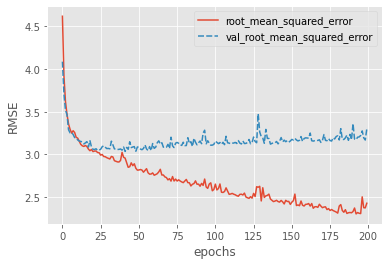

In [25]:
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])
plt.xlabel("epochs")
plt.ylabel("RMSE")
#plt.savefig("03_training_history_3_rmse_smaller_model.png", dpi=200)

## --> here: works a bit, when size is reduced A LOT! But still clearly overfitting...

## Remedy 2: early stopping

In [26]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(
    monitor='val_loss', mode="min",
    patience=10,
    verbose=1
    )

model = create_nn(n_features=X_train.shape[1], n_predictions=1)
model.compile(loss='mse', optimizer=Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])

history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 200,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper],
                    verbose = 2)

Epoch 1/200
16/16 - 1s - loss: 36.7056 - root_mean_squared_error: 6.0585 - val_loss: 32.9609 - val_root_mean_squared_error: 5.7412
Epoch 2/200
16/16 - 0s - loss: 32.6771 - root_mean_squared_error: 5.7164 - val_loss: 32.5679 - val_root_mean_squared_error: 5.7068
Epoch 3/200
16/16 - 0s - loss: 32.0732 - root_mean_squared_error: 5.6633 - val_loss: 31.7508 - val_root_mean_squared_error: 5.6348
Epoch 4/200
16/16 - 0s - loss: 26.8636 - root_mean_squared_error: 5.1830 - val_loss: 15.9397 - val_root_mean_squared_error: 3.9925
Epoch 5/200
16/16 - 0s - loss: 15.7615 - root_mean_squared_error: 3.9701 - val_loss: 14.1616 - val_root_mean_squared_error: 3.7632
Epoch 6/200
16/16 - 0s - loss: 13.7555 - root_mean_squared_error: 3.7088 - val_loss: 13.1431 - val_root_mean_squared_error: 3.6253
Epoch 7/200
16/16 - 0s - loss: 13.0511 - root_mean_squared_error: 3.6126 - val_loss: 12.5255 - val_root_mean_squared_error: 3.5391
Epoch 8/200
16/16 - 0s - loss: 12.4524 - root_mean_squared_error: 3.5288 - val_loss

Text(0, 0.5, 'RMSE')

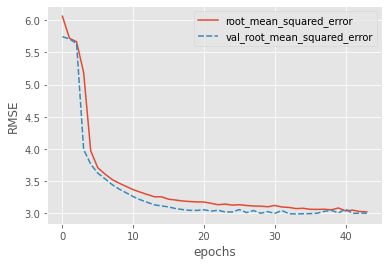

In [27]:
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])
plt.xlabel("epochs")
plt.ylabel("RMSE")
#plt.savefig("03_training_history_3_rmse_early_stopping.png", dpi=200)

In [28]:
# Predict the sunshine hours
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

Text(0, 0.5, 'true sunshine hours')

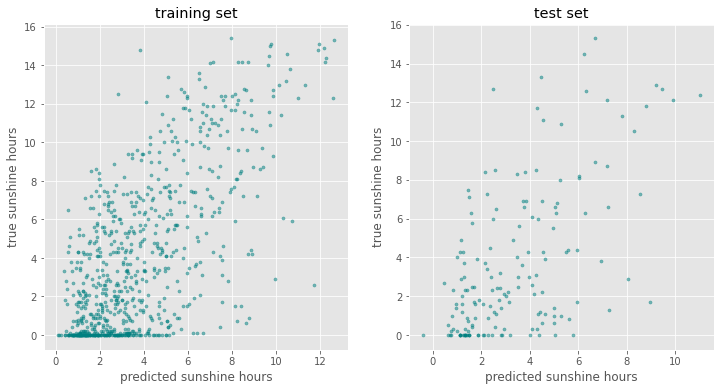

In [29]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.style.use('ggplot')
axes[0].scatter(y_train_predicted, y_train, s=10, alpha=0.5, color="teal")
axes[0].set_title("training set")
axes[0].set_xlabel("predicted sunshine hours")
axes[0].set_ylabel("true sunshine hours")

axes[1].scatter(y_test_predicted, y_test, s=10, alpha=0.5, color="teal")
axes[1].set_title("test set")
axes[1].set_xlabel("predicted sunshine hours")
axes[1].set_ylabel("true sunshine hours")

#plt.savefig("03_regression_compare_training_and_test_performance.png", dpi=200)

## Remedy 3: add dropout

In [30]:
from tensorflow.keras.layers import Dropout

def create_nn(n_features, n_predictions):
    # Input layer
    layers_input = Input(shape=(n_features,), name='input')

    # Dense layers
    layers_dense = Dense(100, 'relu')(layers_input)
    layers_dense = Dropout(rate=0.2)(layers_dense)
    layers_dense = Dense(50, 'relu')(layers_dense)
    layers_dense = Dropout(rate=0.2)(layers_dense)

    # Output layer
    layers_output = Dense(n_predictions)(layers_dense)

    # Defining the model and compiling it
    return Model(inputs=layers_input, outputs=layers_output, name="dropout_prediction_model")

model = create_nn(X_data.shape[1], 1)
model.compile(loss='mse', optimizer=Adam(), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "dropout_prediction_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 163)]             0         
_________________________________________________________________
dense_12 (Dense)             (None, 100)               16400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_13 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_14 (Dense)             (None, 1)                 51        
Total params: 21,501
Trainable params: 21,501
Non-trainable params: 0
______________________________________

In [31]:
earlystopper = EarlyStopping(
    monitor='val_loss', mode="min",
    patience=20,
    verbose=1
    )

history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 200,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper],
                    verbose = 2)

Epoch 1/200
16/16 - 1s - loss: 45.6308 - root_mean_squared_error: 6.7551 - val_loss: 11.4353 - val_root_mean_squared_error: 3.3816
Epoch 2/200
16/16 - 0s - loss: 20.0540 - root_mean_squared_error: 4.4782 - val_loss: 13.9831 - val_root_mean_squared_error: 3.7394
Epoch 3/200
16/16 - 0s - loss: 16.0104 - root_mean_squared_error: 4.0013 - val_loss: 11.5002 - val_root_mean_squared_error: 3.3912
Epoch 4/200
16/16 - 0s - loss: 13.2056 - root_mean_squared_error: 3.6339 - val_loss: 11.4576 - val_root_mean_squared_error: 3.3849
Epoch 5/200
16/16 - 0s - loss: 13.5371 - root_mean_squared_error: 3.6793 - val_loss: 10.3781 - val_root_mean_squared_error: 3.2215
Epoch 6/200
16/16 - 0s - loss: 13.4635 - root_mean_squared_error: 3.6693 - val_loss: 9.9501 - val_root_mean_squared_error: 3.1544
Epoch 7/200
16/16 - 0s - loss: 12.2044 - root_mean_squared_error: 3.4935 - val_loss: 10.3941 - val_root_mean_squared_error: 3.2240
Epoch 8/200
16/16 - 0s - loss: 12.2882 - root_mean_squared_error: 3.5054 - val_loss:

Epoch 64/200
16/16 - 0s - loss: 8.5287 - root_mean_squared_error: 2.9204 - val_loss: 9.9333 - val_root_mean_squared_error: 3.1517
Epoch 65/200
16/16 - 0s - loss: 8.3877 - root_mean_squared_error: 2.8961 - val_loss: 8.9004 - val_root_mean_squared_error: 2.9834
Epoch 66/200
16/16 - 0s - loss: 8.4640 - root_mean_squared_error: 2.9093 - val_loss: 9.3095 - val_root_mean_squared_error: 3.0511
Epoch 00066: early stopping


Text(0, 0.5, 'RMSE')

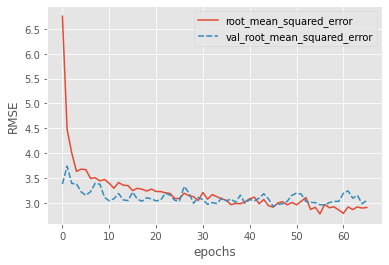

In [32]:
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])
plt.xlabel("epochs")
plt.ylabel("RMSE")
#plt.savefig("03_training_history_4_rmse_dropout.png", dpi=200)

In [33]:
# Predict the sunshine hours
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

Text(0, 0.5, 'true sunshine hours')

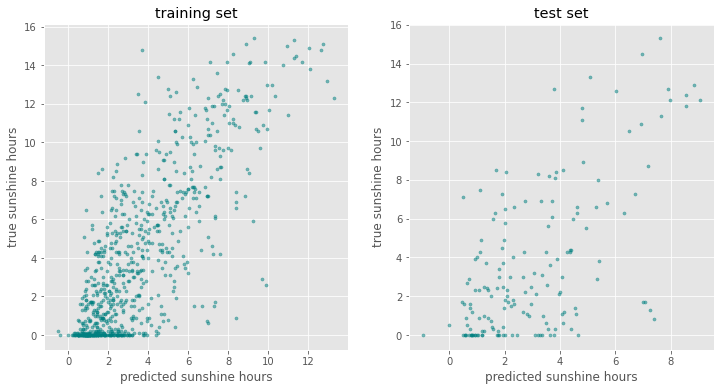

In [34]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.style.use('ggplot')
axes[0].scatter(y_train_predicted, y_train, s=10, alpha=0.5, color="teal")
axes[0].set_title("training set")
axes[0].set_xlabel("predicted sunshine hours")
axes[0].set_ylabel("true sunshine hours")

axes[1].scatter(y_test_predicted, y_test, s=10, alpha=0.5, color="teal")
axes[1].set_title("test set")
axes[1].set_xlabel("predicted sunshine hours")
axes[1].set_ylabel("true sunshine hours")

#plt.savefig("03_regression_compare_training_test_3_dropout.png", dpi=200)

# Compare to naive guess: tomorrow has same sunshine hours as today

Text(0, 0.5, 'true sunshine hours')

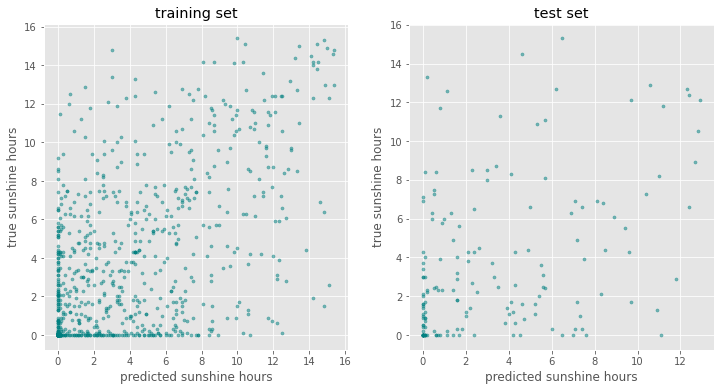

In [42]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.style.use('ggplot')
axes[0].scatter(X_train["DUSSELDORF_sunshine"], y_train, s=10, alpha=0.5, color="teal")
axes[0].set_title("training set")
axes[0].set_xlabel("predicted sunshine hours")
axes[0].set_ylabel("true sunshine hours")

axes[1].scatter(X_test["DUSSELDORF_sunshine"], y_test, s=10, alpha=0.5, color="teal")
axes[1].set_title("test set")
axes[1].set_xlabel("predicted sunshine hours")
axes[1].set_ylabel("true sunshine hours")

#plt.savefig("03_regression_compare_training_test_3_dropout.png", dpi=200)

## Remedy ....
- ....

In [36]:
from tensorflow.keras.layers import Dropout

def create_nn(n_features, n_predictions):
    # Input layer
    layers_input = Input(shape=(n_features,), name='input')

    # Dense layers
    layers_dense = BatchNormalization()(layers_input)
    layers_dense = Dense(100, 'relu')(layers_dense)
    layers_dense = Dropout(rate=0.2)(layers_dense)
    layers_dense = Dense(50, 'relu')(layers_dense)
    layers_dense = Dropout(rate=0.2)(layers_dense)
    layers_dense = Dense(10, 'relu')(layers_dense)

    # Output layer
    layers_output = Dense(n_predictions)(layers_dense)

    # Defining the model and compiling it
    return Model(inputs=layers_input, outputs=layers_output, name="dropout_prediction_model")

model = create_nn(X_data.shape[1], 1)
model.compile(loss='mse', optimizer=Adam(1e-4), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "dropout_prediction_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 163)]             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 163)               652       
_________________________________________________________________
dense_15 (Dense)             (None, 100)               16400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_16 (Dense)             (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_17 (Dense)             (None, 10)   

In [37]:
earlystopper = EarlyStopping(
    monitor='val_loss', mode="min",
    patience=20,
    verbose=1
    )

history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 1000,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper],
                    verbose = 2)

Epoch 1/1000
16/16 - 1s - loss: 38.1190 - root_mean_squared_error: 6.1741 - val_loss: 47.4251 - val_root_mean_squared_error: 6.8866
Epoch 2/1000
16/16 - 0s - loss: 35.9113 - root_mean_squared_error: 5.9926 - val_loss: 36.5962 - val_root_mean_squared_error: 6.0495
Epoch 3/1000
16/16 - 0s - loss: 33.8733 - root_mean_squared_error: 5.8201 - val_loss: 33.0354 - val_root_mean_squared_error: 5.7476
Epoch 4/1000
16/16 - 0s - loss: 32.7629 - root_mean_squared_error: 5.7239 - val_loss: 31.7727 - val_root_mean_squared_error: 5.6367
Epoch 5/1000
16/16 - 0s - loss: 31.4154 - root_mean_squared_error: 5.6049 - val_loss: 30.6284 - val_root_mean_squared_error: 5.5343
Epoch 6/1000
16/16 - 0s - loss: 30.5515 - root_mean_squared_error: 5.5273 - val_loss: 28.6900 - val_root_mean_squared_error: 5.3563
Epoch 7/1000
16/16 - 0s - loss: 28.5194 - root_mean_squared_error: 5.3404 - val_loss: 26.0332 - val_root_mean_squared_error: 5.1023
Epoch 8/1000
16/16 - 0s - loss: 26.3966 - root_mean_squared_error: 5.1378 - 

Epoch 63/1000
16/16 - 0s - loss: 9.9879 - root_mean_squared_error: 3.1604 - val_loss: 9.3742 - val_root_mean_squared_error: 3.0617
Epoch 64/1000
16/16 - 0s - loss: 9.6770 - root_mean_squared_error: 3.1108 - val_loss: 9.3368 - val_root_mean_squared_error: 3.0556
Epoch 65/1000
16/16 - 0s - loss: 9.0136 - root_mean_squared_error: 3.0023 - val_loss: 9.3521 - val_root_mean_squared_error: 3.0581
Epoch 66/1000
16/16 - 0s - loss: 9.7477 - root_mean_squared_error: 3.1221 - val_loss: 9.4090 - val_root_mean_squared_error: 3.0674
Epoch 67/1000
16/16 - 0s - loss: 9.6262 - root_mean_squared_error: 3.1026 - val_loss: 9.3461 - val_root_mean_squared_error: 3.0571
Epoch 68/1000
16/16 - 0s - loss: 9.8284 - root_mean_squared_error: 3.1350 - val_loss: 9.3832 - val_root_mean_squared_error: 3.0632
Epoch 69/1000
16/16 - 0s - loss: 9.4879 - root_mean_squared_error: 3.0802 - val_loss: 9.3598 - val_root_mean_squared_error: 3.0594
Epoch 70/1000
16/16 - 0s - loss: 9.3023 - root_mean_squared_error: 3.0500 - val_los

Epoch 126/1000
16/16 - 0s - loss: 8.3162 - root_mean_squared_error: 2.8838 - val_loss: 9.3157 - val_root_mean_squared_error: 3.0522
Epoch 127/1000
16/16 - 0s - loss: 8.0561 - root_mean_squared_error: 2.8383 - val_loss: 9.2725 - val_root_mean_squared_error: 3.0451
Epoch 128/1000
16/16 - 0s - loss: 7.9663 - root_mean_squared_error: 2.8225 - val_loss: 9.2578 - val_root_mean_squared_error: 3.0427
Epoch 129/1000
16/16 - 0s - loss: 7.4415 - root_mean_squared_error: 2.7279 - val_loss: 9.2547 - val_root_mean_squared_error: 3.0422
Epoch 130/1000
16/16 - 0s - loss: 7.8108 - root_mean_squared_error: 2.7948 - val_loss: 9.2657 - val_root_mean_squared_error: 3.0440
Epoch 131/1000
16/16 - 0s - loss: 7.7769 - root_mean_squared_error: 2.7887 - val_loss: 9.2990 - val_root_mean_squared_error: 3.0494
Epoch 132/1000
16/16 - 0s - loss: 7.8378 - root_mean_squared_error: 2.7996 - val_loss: 9.2833 - val_root_mean_squared_error: 3.0468
Epoch 133/1000
16/16 - 0s - loss: 7.5751 - root_mean_squared_error: 2.7523 -

Text(0, 0.5, 'RMSE')

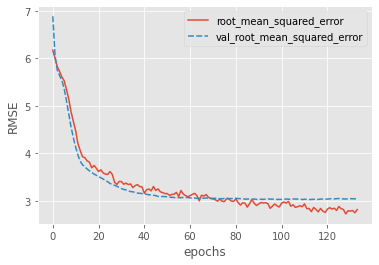

In [38]:
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])
plt.xlabel("epochs")
plt.ylabel("RMSE")

In [39]:
# Predict the sunshine hours
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

Text(0, 0.5, 'true sunshine hours')

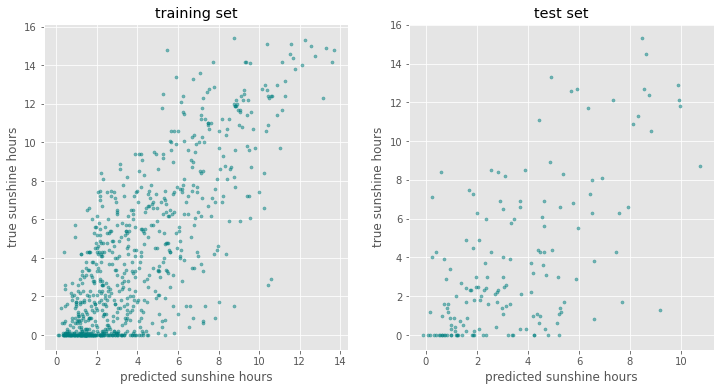

In [40]:
fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.style.use('ggplot')
axes[0].scatter(y_train_predicted, y_train, s=10, alpha=0.5, color="teal")
axes[0].set_title("training set")
axes[0].set_xlabel("predicted sunshine hours")
axes[0].set_ylabel("true sunshine hours")

axes[1].scatter(y_test_predicted, y_test, s=10, alpha=0.5, color="teal")
axes[1].set_title("test set")
axes[1].set_xlabel("predicted sunshine hours")
axes[1].set_ylabel("true sunshine hours")

#plt.savefig("03_regression_compare_training_test_3_dropout.png", dpi=200)

## Conclusions:
- lowering learning rate makes training progress smoother
- overfitting is still very clearly visible

## Optional expansion: model uncertainty
- how to evaluate the model prediction uncertainty

In [28]:
from tensorflow.keras.layers import Dropout

def create_nn(n_features, n_predictions):
    # Input layer
    layers_input = Input(shape=(n_features,), name='input')

    # Dense layers
    layers_dense = BatchNormalization()(layers_input)
    layers_dense = Dense(100, 'relu')(layers_dense)
    layers_dense = Dropout(rate=0.2)(layers_dense, training=True)
    layers_dense = Dense(50, 'relu')(layers_dense)
    layers_dense = Dropout(rate=0.2)(layers_dense, training=True)
    layers_dense = Dense(10, 'relu')(layers_dense)

    # Output layer
    layers_output = Dense(n_predictions)(layers_dense)

    # Defining the model and compiling it
    return Model(inputs=layers_input, outputs=layers_output, name="dropout_prediction_model")

model = create_nn(X_data.shape[1], 1)
model.compile(loss='mse', optimizer=Adam(1e-4), metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "dropout_prediction_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 163)]             0         
_________________________________________________________________
batch_normalization (BatchNo (None, 163)               652       
_________________________________________________________________
dense_3 (Dense)              (None, 100)               16400     
_________________________________________________________________
dropout (Dropout)            (None, 100)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_1 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 10)   

In [30]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(
    monitor='val_loss', mode="min",
    patience=20,
    verbose=1
    )

history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 1000,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper],
                    verbose = 2)

Epoch 1/1000
16/16 - 1s - loss: 45.9263 - root_mean_squared_error: 6.7769 - val_loss: 57.2555 - val_root_mean_squared_error: 7.5667
Epoch 2/1000
16/16 - 0s - loss: 42.2189 - root_mean_squared_error: 6.4976 - val_loss: 44.0618 - val_root_mean_squared_error: 6.6379
Epoch 3/1000
16/16 - 0s - loss: 39.1282 - root_mean_squared_error: 6.2553 - val_loss: 34.7733 - val_root_mean_squared_error: 5.8969
Epoch 4/1000
16/16 - 0s - loss: 36.3331 - root_mean_squared_error: 6.0277 - val_loss: 28.3098 - val_root_mean_squared_error: 5.3207
Epoch 5/1000
16/16 - 0s - loss: 32.5759 - root_mean_squared_error: 5.7075 - val_loss: 23.8917 - val_root_mean_squared_error: 4.8879
Epoch 6/1000
16/16 - 0s - loss: 28.5914 - root_mean_squared_error: 5.3471 - val_loss: 20.8275 - val_root_mean_squared_error: 4.5637
Epoch 7/1000
16/16 - 0s - loss: 25.3419 - root_mean_squared_error: 5.0341 - val_loss: 19.7160 - val_root_mean_squared_error: 4.4403
Epoch 8/1000
16/16 - 0s - loss: 22.3288 - root_mean_squared_error: 4.7253 - 

Epoch 63/1000
16/16 - 0s - loss: 10.9218 - root_mean_squared_error: 3.3048 - val_loss: 11.1517 - val_root_mean_squared_error: 3.3394
Epoch 64/1000
16/16 - 0s - loss: 10.6662 - root_mean_squared_error: 3.2659 - val_loss: 10.7539 - val_root_mean_squared_error: 3.2793
Epoch 65/1000
16/16 - 0s - loss: 10.6341 - root_mean_squared_error: 3.2610 - val_loss: 12.5140 - val_root_mean_squared_error: 3.5375
Epoch 66/1000
16/16 - 0s - loss: 10.9083 - root_mean_squared_error: 3.3028 - val_loss: 10.5940 - val_root_mean_squared_error: 3.2548
Epoch 67/1000
16/16 - 0s - loss: 10.6770 - root_mean_squared_error: 3.2676 - val_loss: 11.0034 - val_root_mean_squared_error: 3.3171
Epoch 68/1000
16/16 - 0s - loss: 10.1213 - root_mean_squared_error: 3.1814 - val_loss: 9.5873 - val_root_mean_squared_error: 3.0963
Epoch 69/1000
16/16 - 0s - loss: 10.7942 - root_mean_squared_error: 3.2855 - val_loss: 10.9264 - val_root_mean_squared_error: 3.3055
Epoch 70/1000
16/16 - 0s - loss: 10.2952 - root_mean_squared_error: 3.

Epoch 125/1000
16/16 - 0s - loss: 9.2527 - root_mean_squared_error: 3.0418 - val_loss: 9.8017 - val_root_mean_squared_error: 3.1308
Epoch 126/1000
16/16 - 0s - loss: 8.8680 - root_mean_squared_error: 2.9779 - val_loss: 10.3351 - val_root_mean_squared_error: 3.2148
Epoch 127/1000
16/16 - 0s - loss: 8.2295 - root_mean_squared_error: 2.8687 - val_loss: 9.7103 - val_root_mean_squared_error: 3.1161
Epoch 128/1000
16/16 - 0s - loss: 8.7144 - root_mean_squared_error: 2.9520 - val_loss: 9.1751 - val_root_mean_squared_error: 3.0290
Epoch 129/1000
16/16 - 0s - loss: 8.7656 - root_mean_squared_error: 2.9607 - val_loss: 10.5730 - val_root_mean_squared_error: 3.2516
Epoch 130/1000
16/16 - 0s - loss: 8.9186 - root_mean_squared_error: 2.9864 - val_loss: 10.3072 - val_root_mean_squared_error: 3.2105
Epoch 131/1000
16/16 - 0s - loss: 7.7278 - root_mean_squared_error: 2.7799 - val_loss: 10.1246 - val_root_mean_squared_error: 3.1819
Epoch 132/1000
16/16 - 0s - loss: 8.4088 - root_mean_squared_error: 2.89

Text(0, 0.5, 'RMSE')

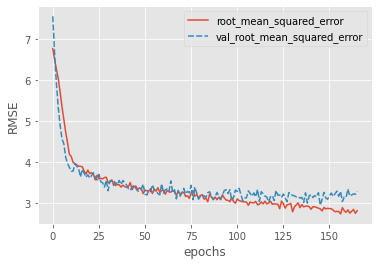

In [31]:
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])
plt.xlabel("epochs")
plt.ylabel("RMSE")

Text(0, 0.5, 'true sunshine hours')

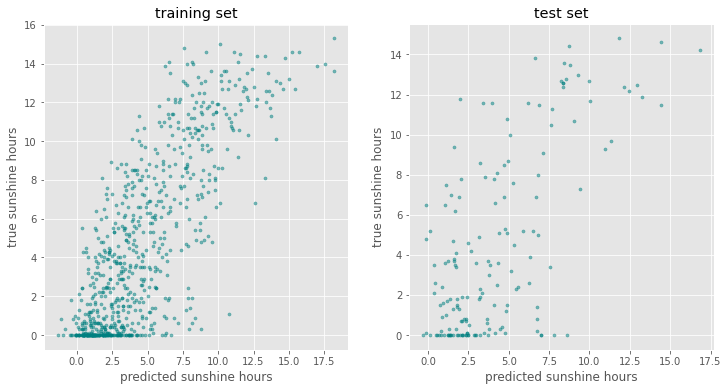

In [32]:
# Predict the sunshine hours
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.style.use('ggplot')
axes[0].scatter(y_train_predicted, y_train, s=10, alpha=0.5, color="teal")
axes[0].set_title("training set")
axes[0].set_xlabel("predicted sunshine hours")
axes[0].set_ylabel("true sunshine hours")

axes[1].scatter(y_test_predicted, y_test, s=10, alpha=0.5, color="teal")
axes[1].set_title("test set")
axes[1].set_xlabel("predicted sunshine hours")
axes[1].set_ylabel("true sunshine hours")

#plt.savefig("03_regression_compare_training_test_3_dropout.png", dpi=200)

In [114]:
y_test_predicted1 = model.predict(X_test)

In [116]:
y_test_predicted1[:10], y_test_predicted[:10]

(array([[2.815557  ],
        [0.55149466],
        [1.3560429 ],
        [5.47015   ],
        [2.5764616 ],
        [1.6612171 ],
        [2.9543374 ],
        [2.1496556 ],
        [4.191012  ],
        [3.3782988 ]], dtype=float32),
 array([[2.883849 ],
        [1.6805757],
        [1.0673314],
        [6.761534 ],
        [2.064123 ],
        [1.2881031],
        [3.1250162],
        [1.79524  ],
        [4.30982  ],
        [3.4653528]], dtype=float32))

In [33]:
from tqdm.notebook import tqdm

n_ensemble = 100
y_test_predicted_ensemble = np.zeros((X_test.shape[0], n_ensemble))

for i in tqdm(range(n_ensemble)):
    y_test_predicted_ensemble[:, i] = model.predict(X_test)[:,0]

  0%|          | 0/100 [00:00<?, ?it/s]

(array([ 7.,  7., 12., 11., 14., 14., 13., 11.,  6.,  5.]),
 array([1.66132295, 1.90555681, 2.14979067, 2.39402453, 2.63825839,
        2.88249224, 3.1267261 , 3.37095996, 3.61519382, 3.85942768,
        4.10366154]),
 <BarContainer object of 10 artists>)

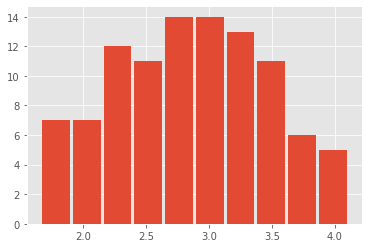

In [128]:
plt.hist(y_test_predicted_ensemble[0,:], rwidth=0.9)

In [34]:
y_test_predicted_mean = np.mean(y_test_predicted_ensemble, axis=1)
y_test_predicted_std = np.std(y_test_predicted_ensemble, axis=1)

In [35]:
y_test_predicted_std.min(), y_test_predicted_std.max()

(0.3999227084666739, 2.723026906761404)

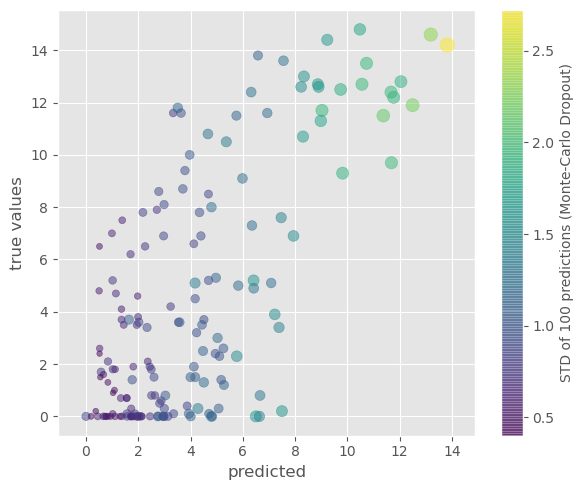

In [50]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
plt.scatter(y_test_predicted_mean, y_test, s=40*y_test_predicted_std, 
            c=y_test_predicted_std, alpha=0.5)
plt.xlabel("predicted")
plt.ylabel("true values")
cbar = plt.colorbar()
cbar.set_label('STD of 100 predictions (Monte-Carlo Dropout)', rotation=90, fontsize=10)

ax.axis("equal")
fig.tight_layout()
plt.savefig("sunshine_tomorrow_monte_carlo_dropout.png", dpi=300)

# Easier to predict labels
## max temperature

In [11]:
# labels
y_data = data.loc[1:(365*3 + 1)]["BASEL_temp_max"]

# Split data into training, validation, and test set

In [12]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0) 
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

print(f"Data split into training ({X_train.shape[0]})," \
      f" validation ({X_val.shape[0]}) and test set ({X_test.shape[0]}).") 

Data split into training (767), validation (164) and test set (165).


In [13]:
# this also shuffled the data!
y_train[:10]

459    17.7
182    27.4
428     9.4
816    11.0
10      3.9
454    11.2
821    19.1
579    33.6
753     7.0
849    14.9
Name: BASEL_temp_max, dtype: float64

In [14]:
y_train.max(), y_train.min()

(34.2, -5.5)

# Build neural network

In [17]:
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [18]:
X_train.shape, y_train.shape

((767, 163), (767,))

In [17]:
from tensorflow import keras

def create_nn(n_features, n_predictions):
    # Input layer
    layers_input = keras.layers.Input(shape=(n_features,), name='input')

    # Dense layers
    layers_dense = keras.layers.BatchNormalization()(layers_input)
    layers_dense = keras.layers.Dense(100, 'relu')(layers_dense)
    layers_dense = keras.layers.Dropout(rate=0.2)(layers_dense, training=True)
    layers_dense = keras.layers.Dense(50, 'relu')(layers_dense)
    layers_dense = keras.layers.Dropout(rate=0.2)(layers_dense, training=True)
    layers_dense = keras.layers.Dense(10, 'relu')(layers_dense)

    # Output layer
    layers_output = keras.layers.Dense(n_predictions)(layers_dense)

    # Defining the model and compiling it
    return keras.models.Model(inputs=layers_input, outputs=layers_output, name="dropout_prediction_model")

model = create_nn(X_data.shape[1], 1)
model.compile(loss='mse', optimizer=keras.optimizers.Adam(1e-4),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "dropout_prediction_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 163)]             0         
_________________________________________________________________
batch_normalization_1 (Batch (None, 163)               652       
_________________________________________________________________
dense_4 (Dense)              (None, 100)               16400     
_________________________________________________________________
dropout_2 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_5 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_3 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_6 (Dense)              (None, 10)   

In [18]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(
    monitor='val_loss', mode="min",
    patience=20,
    verbose=1
    )

history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 1000,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper],
                    verbose = 2)

Epoch 1/1000
16/16 - 2s - loss: 273.6294 - root_mean_squared_error: 16.5417 - val_loss: 190.9749 - val_root_mean_squared_error: 13.8194
Epoch 2/1000
16/16 - 0s - loss: 260.5287 - root_mean_squared_error: 16.1409 - val_loss: 193.9064 - val_root_mean_squared_error: 13.9250
Epoch 3/1000
16/16 - 0s - loss: 246.7823 - root_mean_squared_error: 15.7093 - val_loss: 184.7389 - val_root_mean_squared_error: 13.5919
Epoch 4/1000
16/16 - 0s - loss: 229.5450 - root_mean_squared_error: 15.1507 - val_loss: 180.7579 - val_root_mean_squared_error: 13.4446
Epoch 5/1000
16/16 - 0s - loss: 207.4059 - root_mean_squared_error: 14.4016 - val_loss: 152.2287 - val_root_mean_squared_error: 12.3381
Epoch 6/1000
16/16 - 0s - loss: 186.1016 - root_mean_squared_error: 13.6419 - val_loss: 140.4788 - val_root_mean_squared_error: 11.8524
Epoch 7/1000
16/16 - 0s - loss: 160.0757 - root_mean_squared_error: 12.6521 - val_loss: 118.2404 - val_root_mean_squared_error: 10.8738
Epoch 8/1000
16/16 - 0s - loss: 136.5460 - root_

Epoch 63/1000
16/16 - 0s - loss: 19.0607 - root_mean_squared_error: 4.3659 - val_loss: 20.6687 - val_root_mean_squared_error: 4.5463
Epoch 64/1000
16/16 - 0s - loss: 17.5238 - root_mean_squared_error: 4.1861 - val_loss: 20.6711 - val_root_mean_squared_error: 4.5465
Epoch 65/1000
16/16 - 0s - loss: 20.6789 - root_mean_squared_error: 4.5474 - val_loss: 20.6814 - val_root_mean_squared_error: 4.5477
Epoch 66/1000
16/16 - 0s - loss: 18.3413 - root_mean_squared_error: 4.2827 - val_loss: 19.2824 - val_root_mean_squared_error: 4.3912
Epoch 67/1000
16/16 - 0s - loss: 17.9261 - root_mean_squared_error: 4.2339 - val_loss: 22.4986 - val_root_mean_squared_error: 4.7433
Epoch 68/1000
16/16 - 0s - loss: 16.9752 - root_mean_squared_error: 4.1201 - val_loss: 16.3232 - val_root_mean_squared_error: 4.0402
Epoch 69/1000
16/16 - 0s - loss: 17.1649 - root_mean_squared_error: 4.1431 - val_loss: 20.5471 - val_root_mean_squared_error: 4.5329
Epoch 70/1000
16/16 - 0s - loss: 17.1835 - root_mean_squared_error: 4

Epoch 125/1000
16/16 - 0s - loss: 12.8937 - root_mean_squared_error: 3.5908 - val_loss: 14.5220 - val_root_mean_squared_error: 3.8108
Epoch 126/1000
16/16 - 0s - loss: 12.9076 - root_mean_squared_error: 3.5927 - val_loss: 12.7493 - val_root_mean_squared_error: 3.5706
Epoch 00126: early stopping


Text(0, 0.5, 'RMSE')

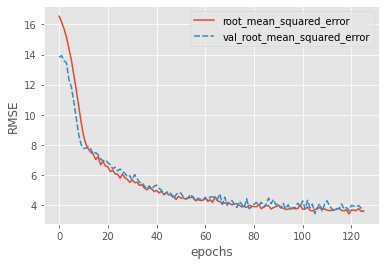

In [22]:
import seaborn as sns
#plt.style.use('ggplot')
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])
plt.xlabel("epochs")
plt.ylabel("RMSE")

Text(0, 0.5, 'true max. temperature')

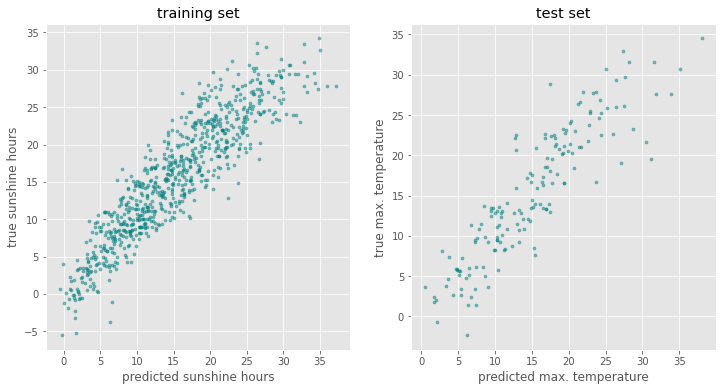

In [23]:
# Predict the sunshine hours
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.style.use('ggplot')
axes[0].scatter(y_train_predicted, y_train, s=10, alpha=0.5, color="teal")
axes[0].set_title("training set")
axes[0].set_xlabel("predicted sunshine hours")
axes[0].set_ylabel("true sunshine hours")

axes[1].scatter(y_test_predicted, y_test, s=10, alpha=0.5, color="teal")
axes[1].set_title("test set")
axes[1].set_xlabel("predicted max. temperature")
axes[1].set_ylabel("true max. temperature")

#plt.savefig("03_regression_compare_training_test_3_dropout.png", dpi=200)

In [24]:
from tqdm.notebook import tqdm

n_ensemble = 100
y_test_predicted_ensemble = np.zeros((X_test.shape[0], n_ensemble))

for i in tqdm(range(n_ensemble)):
    y_test_predicted_ensemble[:, i] = model.predict(X_test)[:,0]

  0%|          | 0/100 [00:00<?, ?it/s]

(array([ 1.,  6.,  8., 18., 18., 16., 10., 11.,  7.,  5.]),
 array([10.93513584, 11.91547918, 12.89582253, 13.87616587, 14.85650921,
        15.83685255, 16.81719589, 17.79753923, 18.77788258, 19.75822592,
        20.73856926]),
 <BarContainer object of 10 artists>)

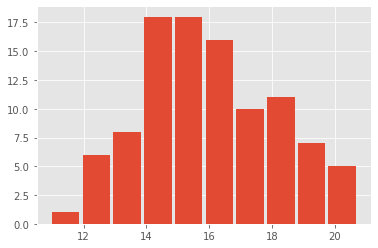

In [25]:
plt.hist(y_test_predicted_ensemble[0,:], rwidth=0.9)

In [26]:
y_test_predicted_mean = np.mean(y_test_predicted_ensemble, axis=1)
y_test_predicted_std = np.std(y_test_predicted_ensemble, axis=1)

In [27]:
y_test_predicted_std.min(), y_test_predicted_std.max()

(0.8292291905547685, 4.530552398166361)

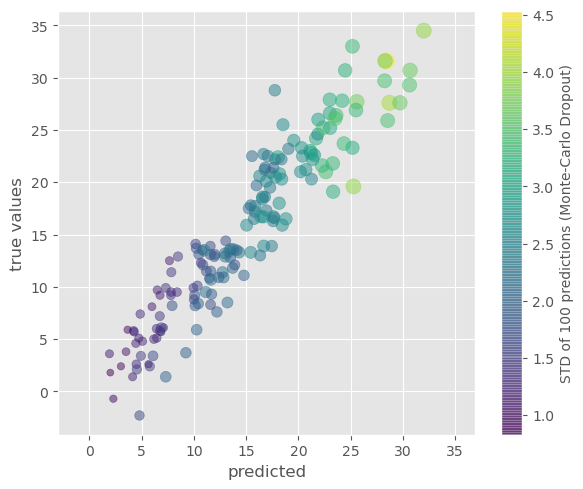

In [29]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
plt.scatter(y_test_predicted_mean, y_test, s=30*y_test_predicted_std, 
            c=y_test_predicted_std, alpha=0.5)
plt.xlabel("predicted")
plt.ylabel("true values")
cbar = plt.colorbar()
cbar.set_label('STD of 100 predictions (Monte-Carlo Dropout)', rotation=90, fontsize=10)

ax.axis("equal")
fig.tight_layout()
plt.savefig("max_temp_tomorrow_monte_carlo_dropout.png", dpi=300)

# Easier to predict labels
## global radiation

In [30]:
# labels
y_data = data.loc[1:(365*3 + 1)]["BASEL_global_radiation"]

predicted_labelname = "predicted global radiation"
true_labelname = "true global radiation"

# Split data into training, validation, and test set

In [31]:
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X_data, y_data, test_size=0.3, random_state=0) 
X_val, X_test, y_val, y_test = train_test_split(X_test, y_test, test_size=0.5, random_state=0)

print(f"Data split into training ({X_train.shape[0]})," \
      f" validation ({X_val.shape[0]}) and test set ({X_test.shape[0]}).") 

Data split into training (767), validation (164) and test set (165).


In [32]:
# this also shuffled the data!
y_train[:10]

459    0.72
182    2.52
428    0.34
816    2.09
10     0.06
454    1.45
821    2.22
579    2.14
753    0.29
849    1.62
Name: BASEL_global_radiation, dtype: float64

In [33]:
y_train.max(), y_train.min()

(3.52, 0.06)

# Build neural network

In [34]:
from tensorflow.keras.layers import Dense, Input, BatchNormalization
from tensorflow.keras.models import Model
from tensorflow.keras.optimizers import Adam

In [35]:
X_train.shape, y_train.shape

((767, 163), (767,))

In [36]:
from tensorflow import keras

def create_nn(n_features, n_predictions):
    # Input layer
    layers_input = keras.layers.Input(shape=(n_features,), name='input')

    # Dense layers
    layers_dense = keras.layers.BatchNormalization()(layers_input)
    layers_dense = keras.layers.Dense(100, 'relu')(layers_dense)
    layers_dense = keras.layers.Dropout(rate=0.2)(layers_dense, training=True)
    layers_dense = keras.layers.Dense(50, 'relu')(layers_dense)
    layers_dense = keras.layers.Dropout(rate=0.2)(layers_dense, training=True)
    layers_dense = keras.layers.Dense(10, 'relu')(layers_dense)

    # Output layer
    layers_output = keras.layers.Dense(n_predictions)(layers_dense)

    # Defining the model and compiling it
    return keras.models.Model(inputs=layers_input, outputs=layers_output, name="dropout_prediction_model")

model = create_nn(X_data.shape[1], 1)
model.compile(loss='mse', optimizer=keras.optimizers.Adam(1e-4),
              metrics=[tf.keras.metrics.RootMeanSquaredError()])
model.summary()

Model: "dropout_prediction_model"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input (InputLayer)           [(None, 163)]             0         
_________________________________________________________________
batch_normalization_2 (Batch (None, 163)               652       
_________________________________________________________________
dense_8 (Dense)              (None, 100)               16400     
_________________________________________________________________
dropout_4 (Dropout)          (None, 100)               0         
_________________________________________________________________
dense_9 (Dense)              (None, 50)                5050      
_________________________________________________________________
dropout_5 (Dropout)          (None, 50)                0         
_________________________________________________________________
dense_10 (Dense)             (None, 10)   

In [37]:
from tensorflow.keras.callbacks import EarlyStopping

earlystopper = EarlyStopping(
    monitor='val_loss', mode="min",
    patience=20,
    verbose=1
    )

history = model.fit(X_train, y_train,
                    batch_size = 32,
                    epochs = 1000,
                    validation_data=(X_val, y_val),
                    callbacks=[earlystopper],
                    verbose = 2)

Epoch 1/1000
16/16 - 1s - loss: 2.3023 - root_mean_squared_error: 1.5173 - val_loss: 3.7605 - val_root_mean_squared_error: 1.9392
Epoch 2/1000
16/16 - 0s - loss: 1.6643 - root_mean_squared_error: 1.2901 - val_loss: 1.9322 - val_root_mean_squared_error: 1.3900
Epoch 3/1000
16/16 - 0s - loss: 1.2324 - root_mean_squared_error: 1.1101 - val_loss: 2.1563 - val_root_mean_squared_error: 1.4684
Epoch 4/1000
16/16 - 0s - loss: 1.0118 - root_mean_squared_error: 1.0059 - val_loss: 1.7896 - val_root_mean_squared_error: 1.3377
Epoch 5/1000
16/16 - 0s - loss: 0.8990 - root_mean_squared_error: 0.9482 - val_loss: 1.9060 - val_root_mean_squared_error: 1.3806
Epoch 6/1000
16/16 - 0s - loss: 0.7890 - root_mean_squared_error: 0.8883 - val_loss: 1.8174 - val_root_mean_squared_error: 1.3481
Epoch 7/1000
16/16 - 0s - loss: 0.7807 - root_mean_squared_error: 0.8836 - val_loss: 1.2836 - val_root_mean_squared_error: 1.1330
Epoch 8/1000
16/16 - 0s - loss: 0.8408 - root_mean_squared_error: 0.9169 - val_loss: 0.905

Epoch 64/1000
16/16 - 0s - loss: 0.3650 - root_mean_squared_error: 0.6042 - val_loss: 0.4387 - val_root_mean_squared_error: 0.6623
Epoch 65/1000
16/16 - 0s - loss: 0.3511 - root_mean_squared_error: 0.5925 - val_loss: 0.2826 - val_root_mean_squared_error: 0.5316
Epoch 66/1000
16/16 - 0s - loss: 0.3470 - root_mean_squared_error: 0.5891 - val_loss: 0.4279 - val_root_mean_squared_error: 0.6541
Epoch 67/1000
16/16 - 0s - loss: 0.3640 - root_mean_squared_error: 0.6033 - val_loss: 0.4080 - val_root_mean_squared_error: 0.6387
Epoch 68/1000
16/16 - 0s - loss: 0.3313 - root_mean_squared_error: 0.5756 - val_loss: 0.3743 - val_root_mean_squared_error: 0.6118
Epoch 69/1000
16/16 - 0s - loss: 0.3501 - root_mean_squared_error: 0.5917 - val_loss: 0.3916 - val_root_mean_squared_error: 0.6258
Epoch 70/1000
16/16 - 0s - loss: 0.3313 - root_mean_squared_error: 0.5756 - val_loss: 0.3595 - val_root_mean_squared_error: 0.5996
Epoch 71/1000
16/16 - 0s - loss: 0.3400 - root_mean_squared_error: 0.5831 - val_los

Text(0, 0.5, 'RMSE')

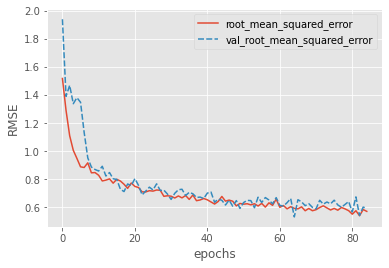

In [38]:
import seaborn as sns
#plt.style.use('ggplot')
history_df = pd.DataFrame.from_dict(history.history)
sns.lineplot(data=history_df[['root_mean_squared_error', 'val_root_mean_squared_error']])
plt.xlabel("epochs")
plt.ylabel("RMSE")

Text(0, 0.5, 'true global radiation')

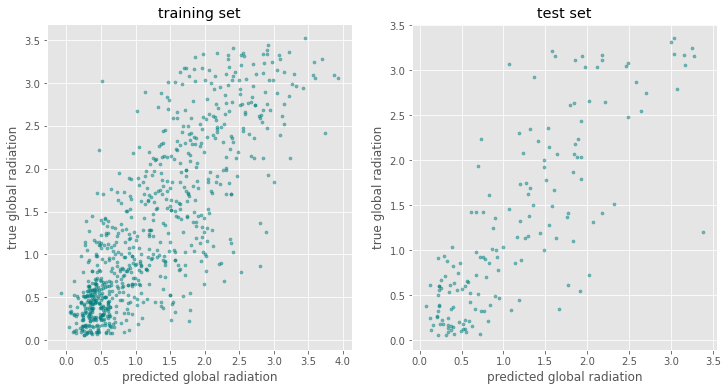

In [39]:
# Predict the sunshine hours
y_train_predicted = model.predict(X_train)
y_test_predicted = model.predict(X_test)

fig, axes = plt.subplots(1, 2, figsize=(12, 6))
plt.style.use('ggplot')
axes[0].scatter(y_train_predicted, y_train, s=10, alpha=0.5, color="teal")
axes[0].set_title("training set")
axes[0].set_xlabel(predicted_labelname)
axes[0].set_ylabel(true_labelname)

axes[1].scatter(y_test_predicted, y_test, s=10, alpha=0.5, color="teal")
axes[1].set_title("test set")
axes[1].set_xlabel(predicted_labelname)
axes[1].set_ylabel(true_labelname)

#plt.savefig("03_regression_compare_training_test_3_dropout.png", dpi=200)

In [40]:
from tqdm.notebook import tqdm

n_ensemble = 100
y_test_predicted_ensemble = np.zeros((X_test.shape[0], n_ensemble))

for i in tqdm(range(n_ensemble)):
    y_test_predicted_ensemble[:, i] = model.predict(X_test)[:,0]

  0%|          | 0/100 [00:00<?, ?it/s]

(array([ 3.,  4.,  9., 21., 20., 19., 14.,  5.,  3.,  2.]),
 array([0.34372425, 0.49473809, 0.64575193, 0.79676577, 0.94777961,
        1.09879345, 1.24980729, 1.40082113, 1.55183496, 1.7028488 ,
        1.85386264]),
 <BarContainer object of 10 artists>)

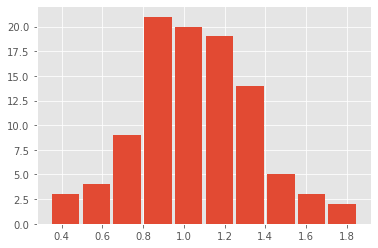

In [41]:
plt.hist(y_test_predicted_ensemble[0,:], rwidth=0.9)

In [42]:
y_test_predicted_mean = np.mean(y_test_predicted_ensemble, axis=1)
y_test_predicted_std = np.std(y_test_predicted_ensemble, axis=1)

In [43]:
y_test_predicted_std.min(), y_test_predicted_std.max()

(0.09528463372830577, 0.6631996140556122)

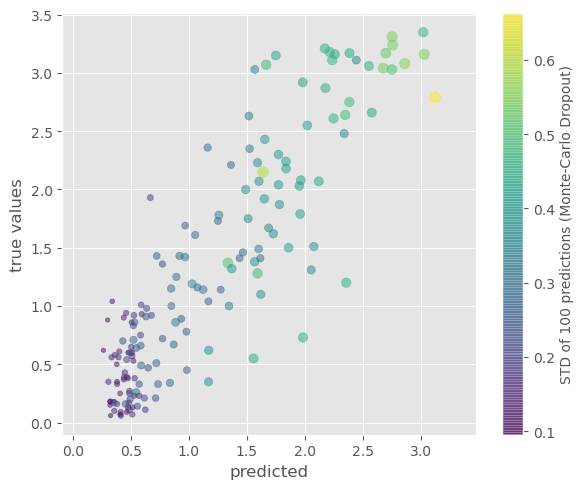

In [45]:
fig, ax = plt.subplots(figsize=(6, 5), dpi=100)
plt.scatter(y_test_predicted_mean, y_test, s=100*y_test_predicted_std, 
            c=y_test_predicted_std, alpha=0.5)
plt.xlabel(predicted_labelname)
plt.ylabel(true_labelname)
cbar = plt.colorbar()
cbar.set_label('STD of 100 predictions (Monte-Carlo Dropout)', rotation=90, fontsize=10)

ax.axis("equal")
fig.tight_layout()
plt.savefig("global_radiation_tomorrow_monte_carlo_dropout.png", dpi=300)